# <font color='blue'>Portfólio - Preço de Casa - Regressão Linear</font>


### Prevendo o Preço de casa

### Suponha que você queira prever o preço de uma casa. Para isso, vamos criar um modelo de regressão linear para prever o preço real de uma casa, com base na metragem quadrade de uma casa.

### O dataset foi retirado no Kaggle, que segue o link abaixo:
https://www.kaggle.com/harlfoxem/housesalesprediction

### <font color='blue'>O conjunto de técnicas de regressão é muito provavelmente um dos mais simples modelos utilizadoa em análises de dados que procuram entender a relação entre o comportamento de determinado fenômeno e o comportamento de uma ou mais variáveis potencialmente preditoras, sem que haja, entretanto uma obrigatória relação de causa e efeito.</font>

In [145]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import seaborn as sea
%matplotlib inline

## Explorando o Dataset 

In [190]:
data = pd.read_csv('house-prices.csv')

In [191]:
type(data)

pandas.core.frame.DataFrame

In [192]:
data.shape

(21613, 21)

In [193]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [194]:
data.columns[:]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [195]:
df = data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [196]:
df.rename(columns={'id':'Index', 'date':'Data', 'price':'Preco', 'bedrooms':'Quartos', 'bathrooms':'Banheiros', 'sqft_living':'area_util',
       'sqft_lot':'lote', 'floors':'andares', 'waterfront':'beira_mar', 'view':'vista', 'condition':'condicao', 'grade':'nota',
       'sqft_above':'above', 'sqft_basement':'basement', 'yr_built':'ano_construcao', 'yr_renovated':'reforma', 'zipcode':'cep',
       'lat':'latitude', 'long':'longitude', 'sqft_living15':'living', 'sqft_lot15':'lot15'}, inplace = True)
df.head()

,Index,Data,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,...,nota,above,basement,ano_construcao,reforma,cep,latitude,longitude,living,lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
df.to_csv('dataframe.csv')

In [169]:
df.drop(columns={'Index','Data', 'above','basement', 'cep','latitude', 'longitude','living', 'lot15'}, inplace = True)
df.head()

,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,condicao,nota,ano_construcao,reforma
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0


In [170]:
df.isnull().sum(axis=0)

Preco             0
Quartos           0
Banheiros         0
area_util         0
lote              0
andares           0
beira_mar         0
vista             0
condicao          0
nota              0
ano_construcao    0
reforma           0
dtype: int64

In [171]:
df['ano_construcao'].value_counts(dropna=False)

2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1966    250
1950    250
1994    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     59
1917     56
1914     54
1938     52
1903     46
1904     45
1936     40
1932     38
2015     38
1933     30
1901     29
1902     27
1935     24
1934     21
Name: ano_construcao, Length: 116, dtype: int64

In [172]:
df1 = df
df1['ano_construcao'] = 2019 - df1.ano_construcao
df1.head()

,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,condicao,nota,ano_construcao,reforma
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,64,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,68,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,86,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,54,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,32,0


In [173]:
from datetime import datetime 
atual = datetime.now()

In [174]:
df2 = df1
df2['reforma'] = df2['reforma'].apply(lambda x: 0 if x == 0 else atual.year - x)
df2.head()

,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,condicao,nota,ano_construcao,reforma
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,64,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,68,28
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,86,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,54,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,32,0


In [175]:
df1['reforma'].value_counts(dropna=False)

0     20699
5        91
6        37
16       36
14       35
19       35
12       35
15       26
29       25
13       24
30       22
17       22
10       22
28       20
21       19
26       19
18       19
25       19
11       18
32       18
35       18
36       18
9        18
27       17
33       17
20       17
34       17
24       16
4        16
31       15
      ...  
41        6
44        6
55        5
54        5
38        5
61        5
46        5
47        4
59        4
56        4
50        4
62        3
45        3
43        3
63        3
64        3
74        3
66        3
48        2
79        2
52        2
69        2
57        2
73        2
65        1
68        1
85        1
75        1
60        1
71        1
Name: reforma, Length: 70, dtype: int64

In [176]:
df2['reforma'].value_counts(dropna=False)

0     20699
5        91
6        37
16       36
14       35
19       35
12       35
15       26
29       25
13       24
30       22
17       22
10       22
28       20
21       19
26       19
18       19
25       19
11       18
32       18
35       18
36       18
9        18
27       17
33       17
20       17
34       17
24       16
4        16
31       15
      ...  
41        6
44        6
55        5
54        5
38        5
61        5
46        5
47        4
59        4
56        4
50        4
62        3
45        3
43        3
63        3
64        3
74        3
66        3
48        2
79        2
52        2
69        2
57        2
73        2
65        1
68        1
85        1
75        1
60        1
71        1
Name: reforma, Length: 70, dtype: int64

## Vizualização dos Dados

In [179]:
def plot_corr(df2, size=20):
    corr = df2.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

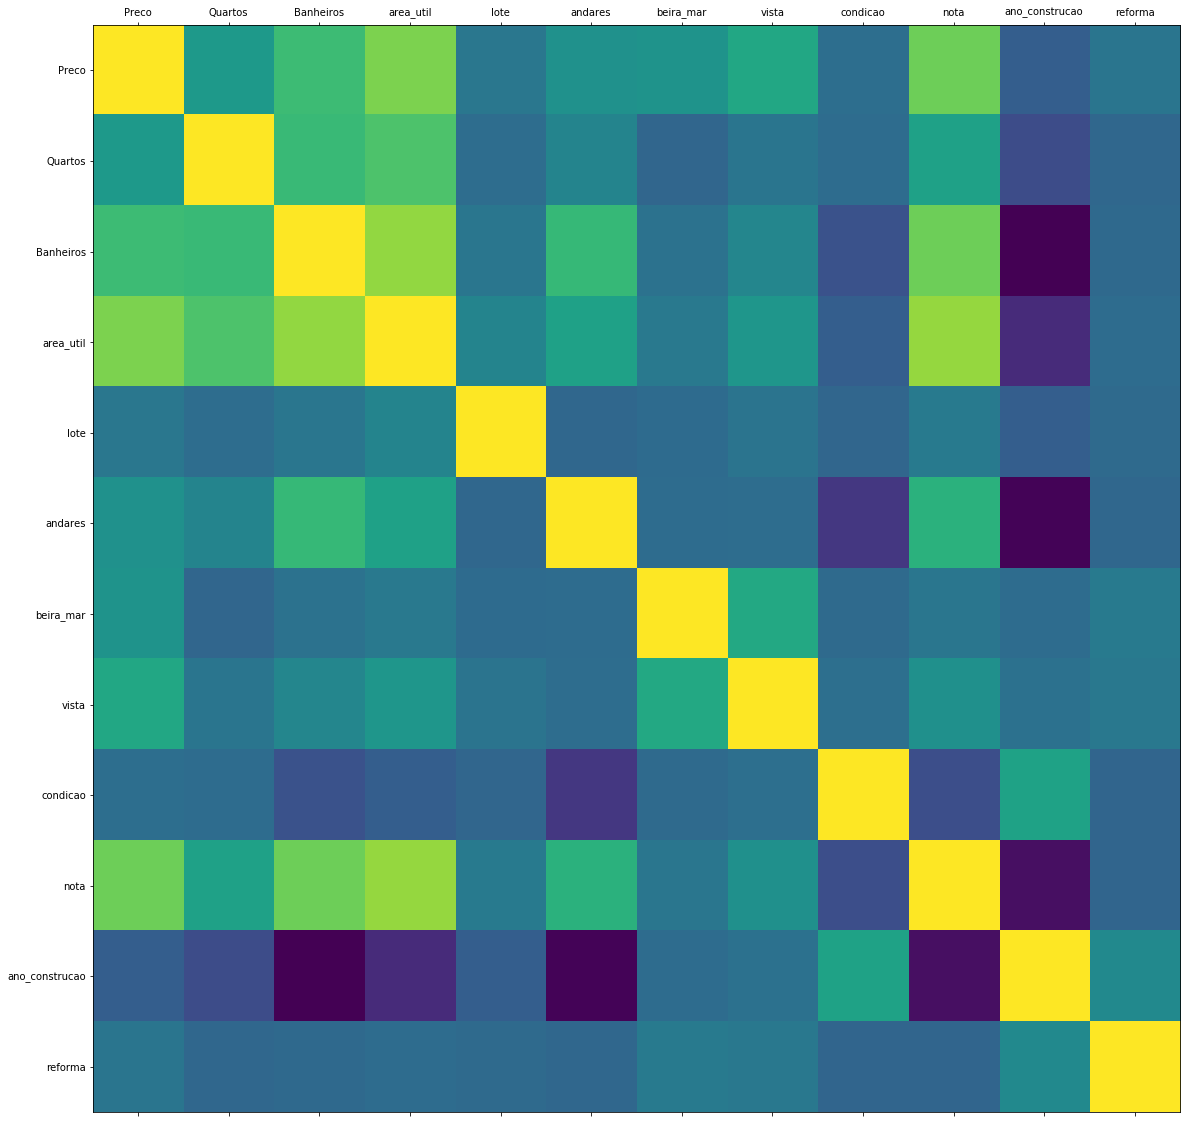

In [180]:
plot_corr(df2)

In [182]:
df2.corr()

,Preco,Quartos,Banheiros,area_util,lote,andares,beira_mar,vista,condicao,nota,ano_construcao,reforma
Preco,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,-0.054012,0.079517
Quartos,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,-0.154178,-0.005217
Banheiros,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,-0.506019,0.007326
area_util,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,-0.318049,0.026220
lote,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,-0.053080,0.013611
andares,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,-0.489319,-0.000454
beira_mar,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.026161,0.105854
vista,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.053440,0.095932
condicao,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,0.361417,-0.015501
nota,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,-0.446963,-0.017352


Text(0.5,1,'Valor em cada x Área do Terreno')

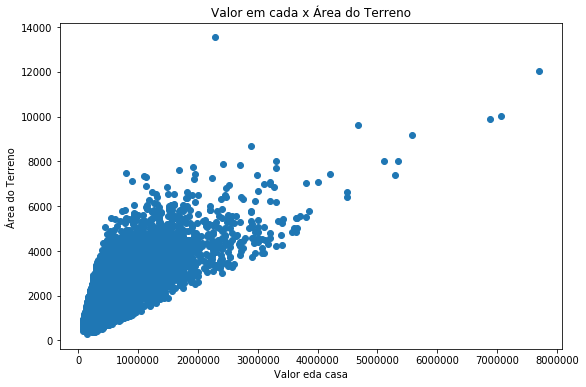

In [183]:
grafico = plt.figure(figsize=(9,6))
plt.scatter(df2['Preco'], df['area_util'])
plt.xlabel('Valor eda casa')
plt.ylabel('Área do Terreno ')
plt.title('Valor em cada x Área do Terreno')

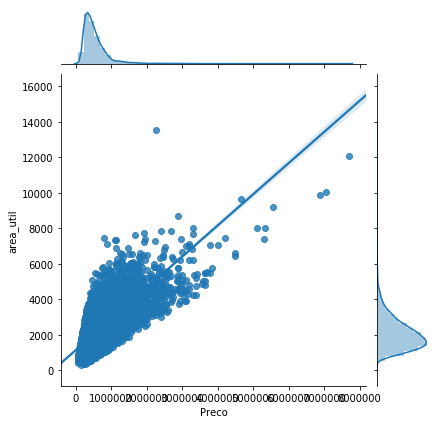

In [185]:
sea.jointplot("Preco", "area_util", df2, kind = 'reg');


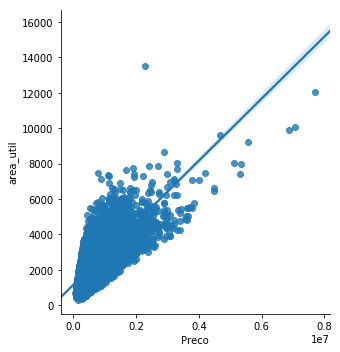

In [209]:
sea.lmplot("Preco", "area_util", df2, fit_reg = True);

In [210]:
df2.to_csv('dataframe1.csv')